# Color Fundamentals

This notebook describes a few fundamental aspects of how we perceive colors, and then proceeds to quantify a couple different colormaps in that context.

We will start by describing the color matching function, then the response function of the three cones in a human eye.  Links to data are included.  Following this, we'll demonstrate how colormaps fit into the spectrum, and how to use the package [palettable](https://jiffyclub.github.io/palettable/).

In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt
import csv
import numpy as np
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["figure.dpi"] = 200
plt.style.use("seaborn")

## Colors and Eyes

We'll load up the Stiles & Burch 1955 2-degree color matching functions, via http://www.cvrl.org/database/text/cmfs/sbrgb2.htm .

This will give us the chromatic responses for an observer.

In [25]:
with open("data/sbrgb2.csv") as f:
    data = [[] for _ in 'Wrgb']
    reader = csv.reader(f)
    for row in csv.reader(f):
        for l, v in zip(data, row):
            l.append(float(v))
    wavelength = np.array(data[0])
    data = np.array([data[1], data[2], data[3]])

We'll plot them now, so that we can see the wavelength and response.

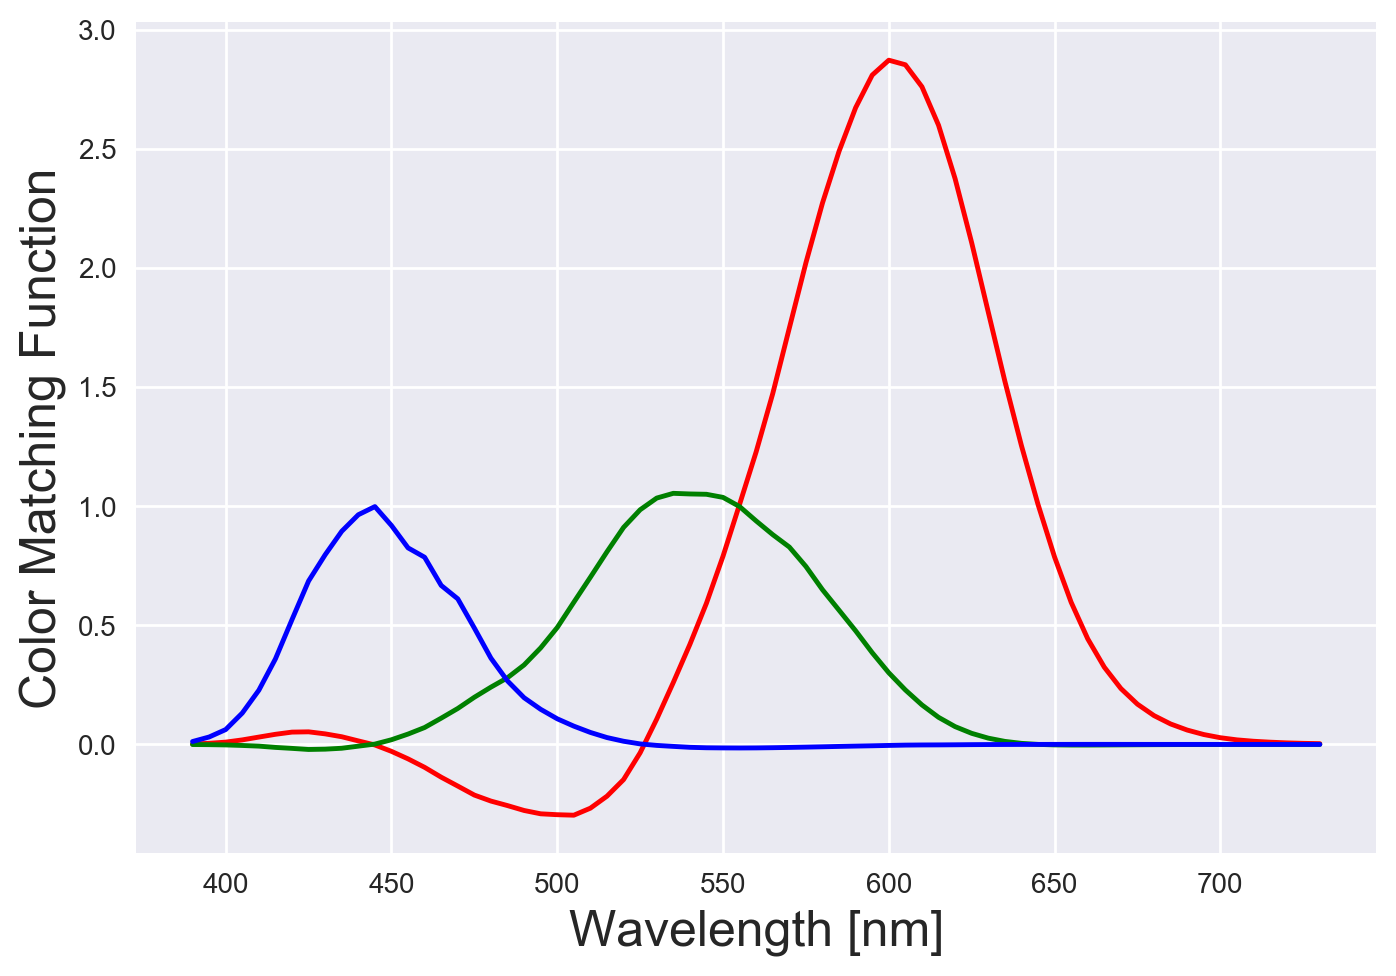

In [26]:
plt.plot(wavelength, data[0], '-r')
plt.plot(wavelength, data[1], '-g')
plt.plot(wavelength, data[2], '-b')
plt.xlabel("Wavelength [nm]", fontsize=18)
plt.ylabel("Color Matching Function", fontsize=18)
plt.savefig("images/cmf.png")

Now, let's convert these to the sensitivity of LMS.

In [27]:
# Now we convert these to LMS; Stockman, MacLeod & Johnson 1993
coeffs = np.array([
    [0.214808, 0.751035, 0.045156],
    [0.022882, 0.940534, 0.076827],
    [0.000000, 0.016500, 0.999989]
])
L, M, S = (data[0] * coeffs[i,0] 
         + data[1] * coeffs[i,1] 
         + data[2] * coeffs[i,2] for i in range(3))

We'll plot these now.

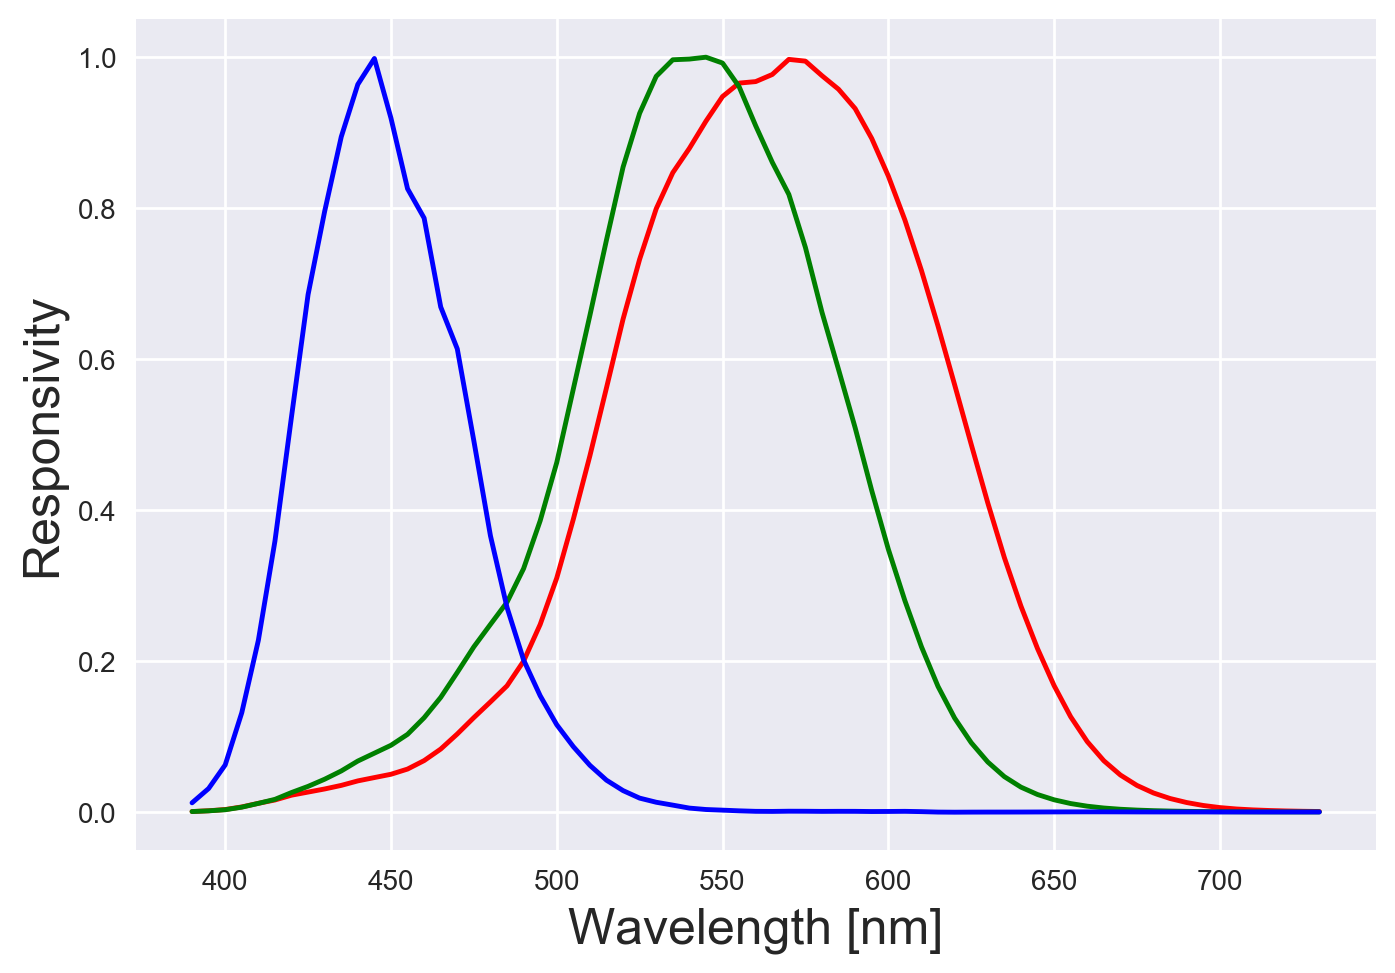

In [28]:
plt.plot(wavelength, L, '-r')
plt.plot(wavelength, M, '-g')
plt.plot(wavelength, S, '-b')
plt.xlabel("Wavelength [nm]", fontsize=18)
plt.ylabel("Responsivity", fontsize=18)
plt.savefig("images/resp.png")

Now we'll convert wavelength to RGB; this code was heavily borrowed  from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python

Note that this isn't necessarily the *best* way to generate RGB curves; in fact, it does not cover the full spectrum of colors expressible in RGB.  We'll demonstrate that below.

In [29]:
wavelength = np.mgrid[wavelength[0]:wavelength[-1]:1024j]
gamma = 0.8

i1 = (wavelength >= 380) & (wavelength < 440)
i2 = (wavelength >= 440) & (wavelength < 490)
i3 = (wavelength >= 490) & (wavelength < 510)
i4 = (wavelength >= 510) & (wavelength < 580)
i5 = (wavelength >= 580) & (wavelength < 645)
i6 = (wavelength >= 645) & (wavelength < 750)

R, G, B = (np.zeros_like(wavelength) for _ in 'RGB')

a1 = attenuation = 0.3 + 0.7 * (wavelength[i1] - 380) / (440 - 380)
R[i1] = ((-(wavelength[i1] - 440) / (440 - 380)) * a1) ** gamma
G[i1] = 0.0
B[i1] = (1.0 * a1) ** gamma

R[i2] = 0.0
G[i2] = ((wavelength[i2] - 440) / (490 - 440)) ** gamma
B[i2] = 1.0

R[i3] = 0.0
G[i3] = 1.0
B[i3] = (-(wavelength[i3] - 510) / (510 - 490)) ** gamma

R[i4] = ((wavelength[i4] - 510) / (580 - 510)) ** gamma
G[i4] = 1.0
B[i4] = 0.0

R[i5] = 1.0
G[i5] = (-(wavelength[i5] - 645) / (645 - 580)) ** gamma
B[i5] = 0.0

a2 = 0.3 + 0.7 * (750 - wavelength[i6]) / (750 - 645)
R[i6] = (1.0 * a2) ** gamma
G[i6] = 0.0
B[i6] = 0.0

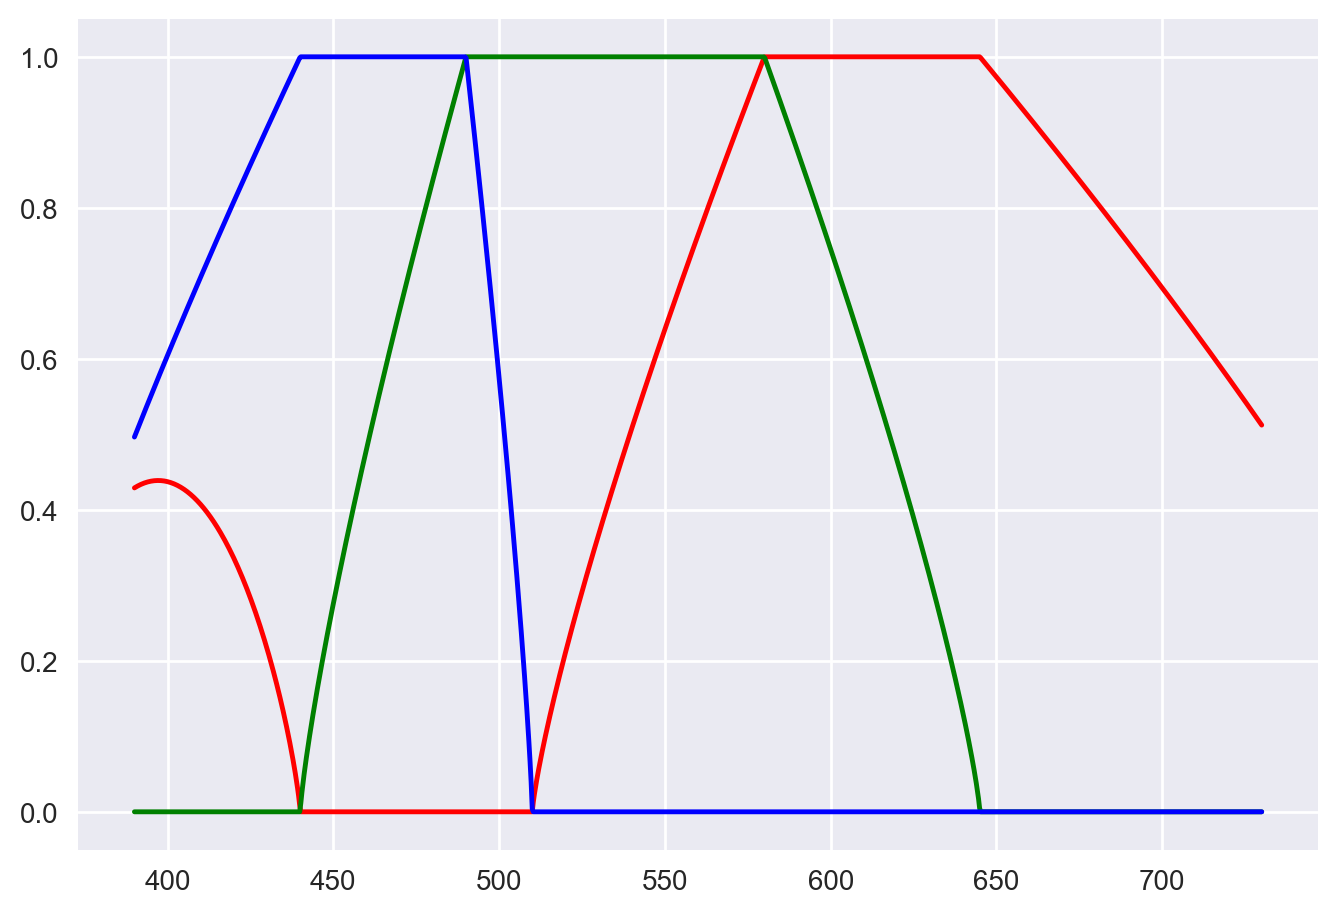

In [30]:
plt.plot(wavelength, R, '-r')
plt.plot(wavelength, G, '-g')
plt.plot(wavelength, B, '-b')

Above, you can see the RGB values as a line plot.  Below, we'll plot the RGB as a color, across these wavelengths.

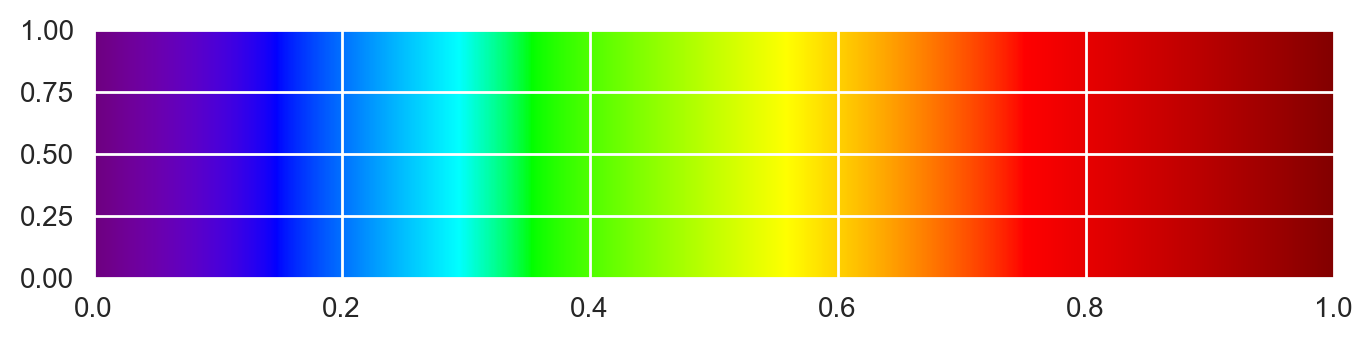

In [31]:
im = np.ones((wavelength.size, wavelength.size, 4))
im[:,:,0] *= R
im[:,:,1] *= G
im[:,:,2] *= B
im *= 255
im = im.astype("uint8")

plt.imshow(im, extent = [0.0, 1.0, 0.0, 1.0], aspect = 1.0/5)

What do some of our colormaps look like?  We'll check out viridis, which is a pretty awesome colormap.